<a href="https://colab.research.google.com/github/antonvandike/Algoritmos-Geneticos/blob/main/Libro_Eyal_Wirsansky/Handson_chapter_4_2_tsp_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solucion del problema del agente de ventas viajero

###Configuraciones y definiciones

In [2]:
pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.7 MB/s eta 0:00:00


In [3]:
pip install tsplib95

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not inst

In [4]:
## Paso 1: Modulos
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random as rd
import array as arr

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tsplib95
import elitism

In [5]:
## Paso 2: Crear una instancia de las caracteristicas del problema

with open('bayg29.tsp') as f:
  text = f.read()

tsp = tsplib95.parse(text)

In [6]:
## Paso 2: Parametros del problema

# Contenido del problema del agente viajero

POPULATION_SIZE = 300     # Tamaño de la poblacion de individuos
P_CROSSOVER     =  0.9    # Probabilidad de cruza
P_MUTATION      =  0.05    # Probabilidad de mutación

MAX_GENERATIONS = 200     # Maximo numero de generaciones (condición de termino)

In [7]:
HALL_OF_FAME_SIZE = 30

In [8]:
## Paso 3: Elementos aleatorios

RANDOM_SEED = 42          # Comunmente cuando se experimenta con un codigo
rd.seed(RANDOM_SEED)      # se corre el problema con los mismos parametros
                          # para repetir y compara resultados

In [9]:
## Paso 4: Declarando el cromosoma
toolbox = base.Toolbox()
toolbox.register("randomOrder", rd.sample, range(tsp.dimension), tsp.dimension)

In [10]:
## Paso 5: Crear la funcion de aptitud (FITNESS)

# Se indica maximizacion y un solo peso
creator.create('FitnessMin', base.Fitness, weights = (-1.0,))

In [11]:
## Paso 6: Crear la funcion de  aptitud del individuo

creator.create("Individual", arr.array, typecode='i', fitness=creator.FitnessMin)

In [12]:
## Paso 7: Declarar el operador para generador de individuos

toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder)

In [13]:
## Paso 8: Declarar el operador para generar la poblacion

toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [14]:
# Funcion para calcular la distancia
def TotalDistance(indices):

  distancia = 0
  for x in range(-1,len(indices)-1):

    edge = indices[x]+1,indices[x+1]+1
    distancia = distancia + tsp.get_weight(*edge)

  return distancia

In [15]:
## Paso 9: Definir función para calcular la aptitud
def tpsDistance(individual):

  return TotalDistance(individual),  # return a tuple

In [16]:
## Paso 10: Declarar el operador de evaluacion

toolbox.register("evaluate", tpsDistance)

In [17]:
## Paso 11: Declarar los operadores geneticos

toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb = 1.0/tsp.dimension)

###Evolucionando la solución

In [18]:
def TSP_problem():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with hof feature added:
    population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print best individual info:
    best = hof.items[0]
    print("-- Best Ever Individual = ", best)
    print("-- Solución exacta al problema bayg29 = ", 1610)
    print("-- Best Ever Fitness = ", best.fitness.values[0])


    # plot statistics:
    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
    plt.figure(2)
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Min / Average Fitness')
    plt.title('Min and Average fitness over Generations')
    plt.show()

    colores = ["*b-","*m-"]
    plt.figure(figsize=(12, 8))
    ax1 = plt.subplot(2,3,1)
    ax2 = plt.subplot(2,3,2)

    axes = [ax1, ax2]



    color = 0

    optimalSolution = [0, 27, 5, 11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 3, 14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 7, 26, 15, 12, 23]
    c = [best,optimalSolution]

    for y1 in range(2):
      for x in range(-1,tsp.dimension-1):
        a = tsp.display_data[c[y1][x]+1]
        b = tsp.display_data[c[y1][x+1]+1]
        axes[y1].plot([a[0],b[0]],[a[1],b[1]],colores[y1])

    # show both plots:
    plt.title('Comparación de la solución\nobtenida y la solución real')
    plt.show()




gen	nevals	min 	avg    
0  	300   	3789	4736.85
1  	247   	3518	4446.9 
2  	239   	3469	4244.01
3  	252   	3417	4084.08
4  	240   	3403	3957.88
5  	242   	3151	3814.92
6  	238   	2871	3719.71
7  	233   	2871	3615.87
8  	242   	2852	3502.21
9  	247   	2852	3435.64
10 	260   	2798	3372.25
11 	238   	2780	3282.63
12 	253   	2740	3221.76
13 	245   	2589	3186.01
14 	238   	2553	3115.43
15 	249   	2553	3054.42
16 	247   	2455	3015.13
17 	243   	2455	2968.55
18 	245   	2404	2935.15
19 	249   	2336	2901.85
20 	246   	2336	2872.21
21 	246   	2336	2853.92
22 	254   	2269	2804.99
23 	254   	2253	2791.32
24 	233   	2244	2730.84
25 	244   	2191	2684.56
26 	254   	2107	2641.75
27 	248   	2107	2551.26
28 	244   	2075	2517.02
29 	244   	2071	2449.51
30 	247   	2005	2412.27
31 	241   	2005	2372.8 
32 	248   	2005	2334.11
33 	239   	1956	2287.01
34 	230   	1928	2253.05
35 	243   	1880	2219.11
36 	259   	1861	2218.13
37 	241   	1861	2174.11
38 	247   	1835	2136.8 
39 	249   	1835	2109.01
40 	248   	1829	

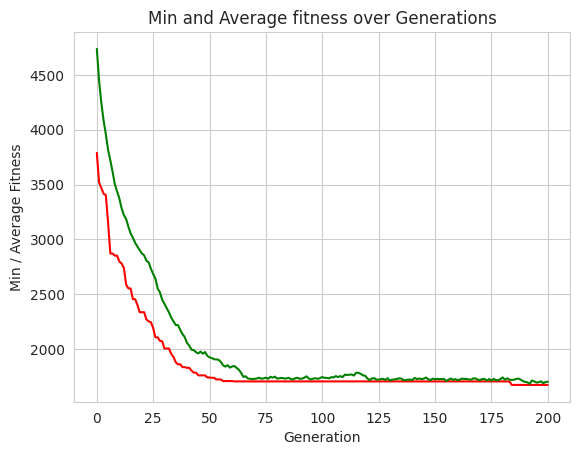

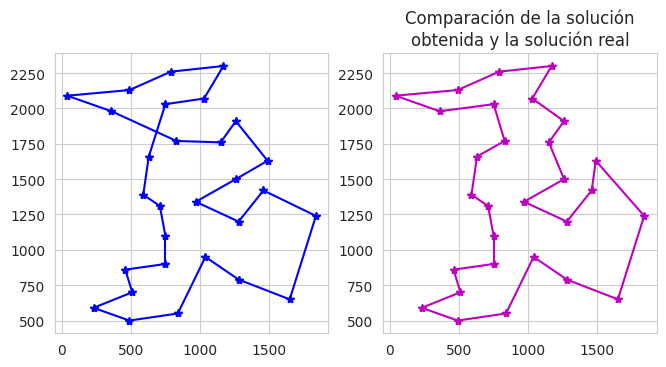

In [19]:
TSP_problem()